In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import os
import beamline34IDC
from aps_ai.beamline34IDC.simulation.facade import Implementors
from aps_ai.beamline34IDC.simulation.facade.focusing_optics_interface import Movement

from aps_ai.beamline34IDC.facade.focusing_optics_factory import focusing_optics_factory_method, ExecutionMode
from aps_ai.beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution,\
    load_shadow_beam, PreProcessorFiles, EmptyBeamException
import beamline34IDC.optimization.common as opt_common
from aps_ai.beamline34IDC.simulation.facade.focusing_optics_interface import get_default_input_features
#import beamline34IDC.optimization.movers as movers
from aps_ai.beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
from pathlib import Path
#from aps_ai.beamline34IDC.util.redirect_shadow_output import redirected_output

In [3]:
%matplotlib inline

In [4]:
DEFAULT_RANDOM_SEED = 111

In [8]:
root_dir = '/'.join(beamline34IDC.__file__.split('/')[:-2])
work_dir = root_dir + '/work_directory'
os.chdir(work_dir)
input_beam_path = "primary_optics_system_beam.dat"
#input_beam = load_shadow_beam()

In [10]:
save_figs = False

In [11]:
if save_figs:
    fig_save_path = 'figures/other_tests/'
    if not os.path.isdir(fig_save_path):
        print("Fig save directory does not exist. Trying to create.")
        os.mkdir(fig_save_path)

In [49]:
def reinitialize(input_beam_path):
    clean_up()

    input_beam = load_shadow_beam(input_beam_path)
    input_features = get_default_input_features()
    focusing_system = focusing_optics_factory_method(implementor=Implementors.SHADOW, bender=2)

    focusing_system.initialize(input_photon_beam=input_beam,
                           input_features=input_features,
                           power=1,
                           rewrite_preprocessor_files=PreProcessorFiles.NO,
                           rewrite_height_error_profile_files=False)
    
    return focusing_system


In [13]:
clean_up()

In [19]:
# Focusing Optics System -------------------------
#with redirected_output():
focusing_system = reinitialize(input_beam_path=input_beam_path)

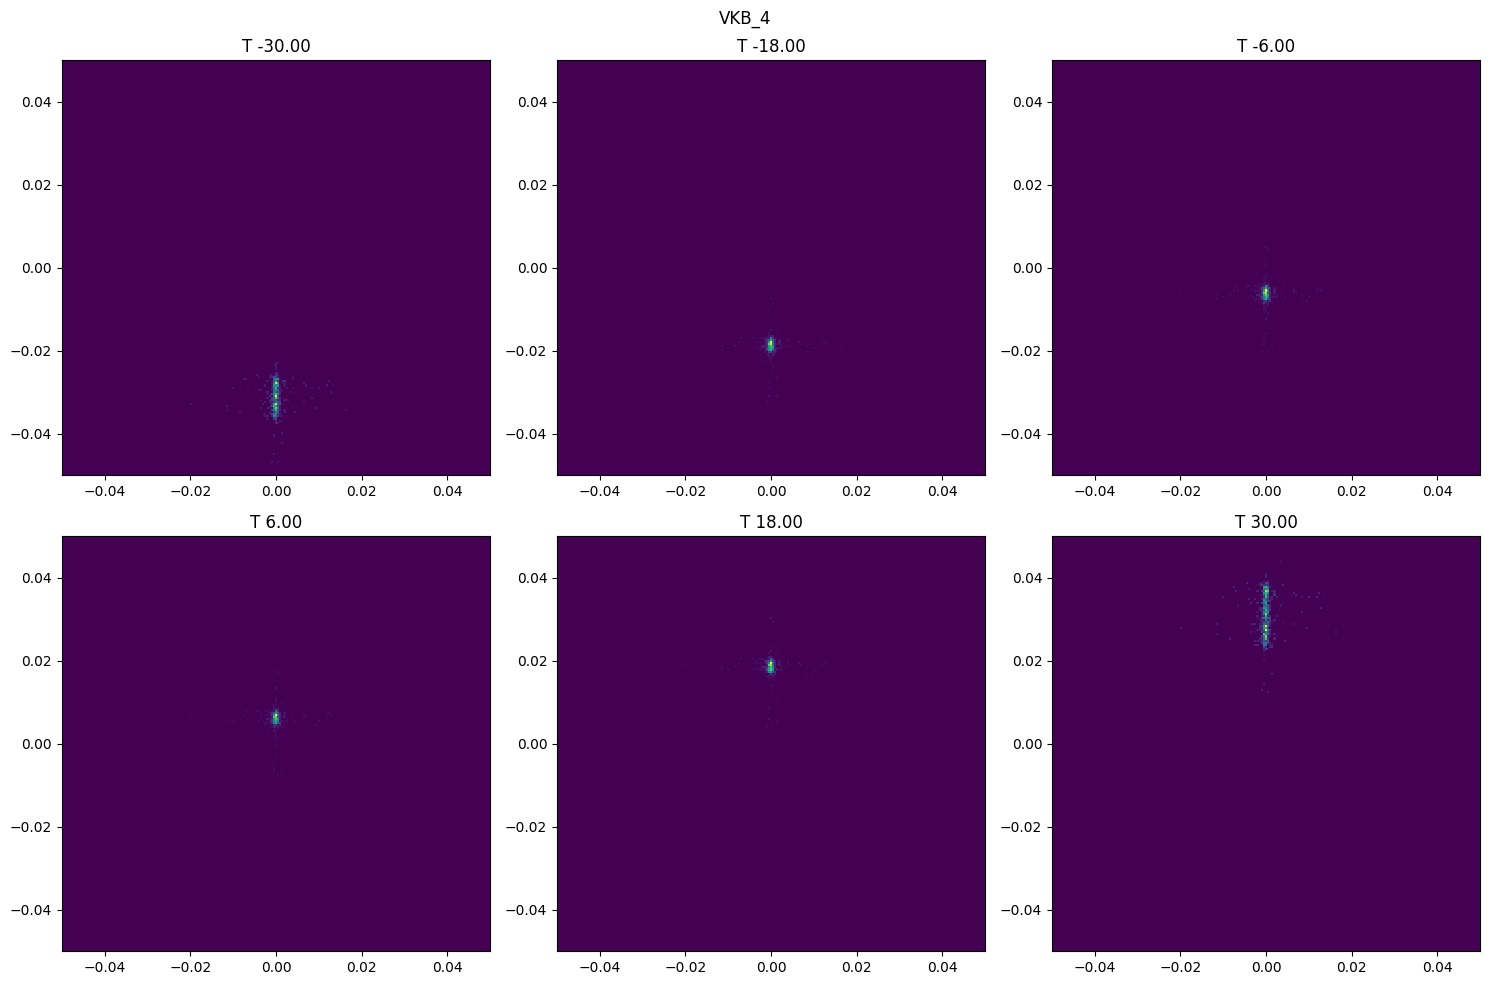

In [36]:
# Motor vkb 4
translations = np.linspace(-30, 30, 6)
initial_value = focusing_system.get_vkb_motor_4_translation()

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_vkb_motor_4_translation(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam, xrange=[-0.05, 0.05], yrange=[-0.05, 0.05])
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D.T)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    #plot_shadow_beam_spatial_distribution(trans_beam)
    # Resetting to initial value
    focusing_system.move_vkb_motor_4_translation(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('VKB_4')
plt.tight_layout()
plt.show()


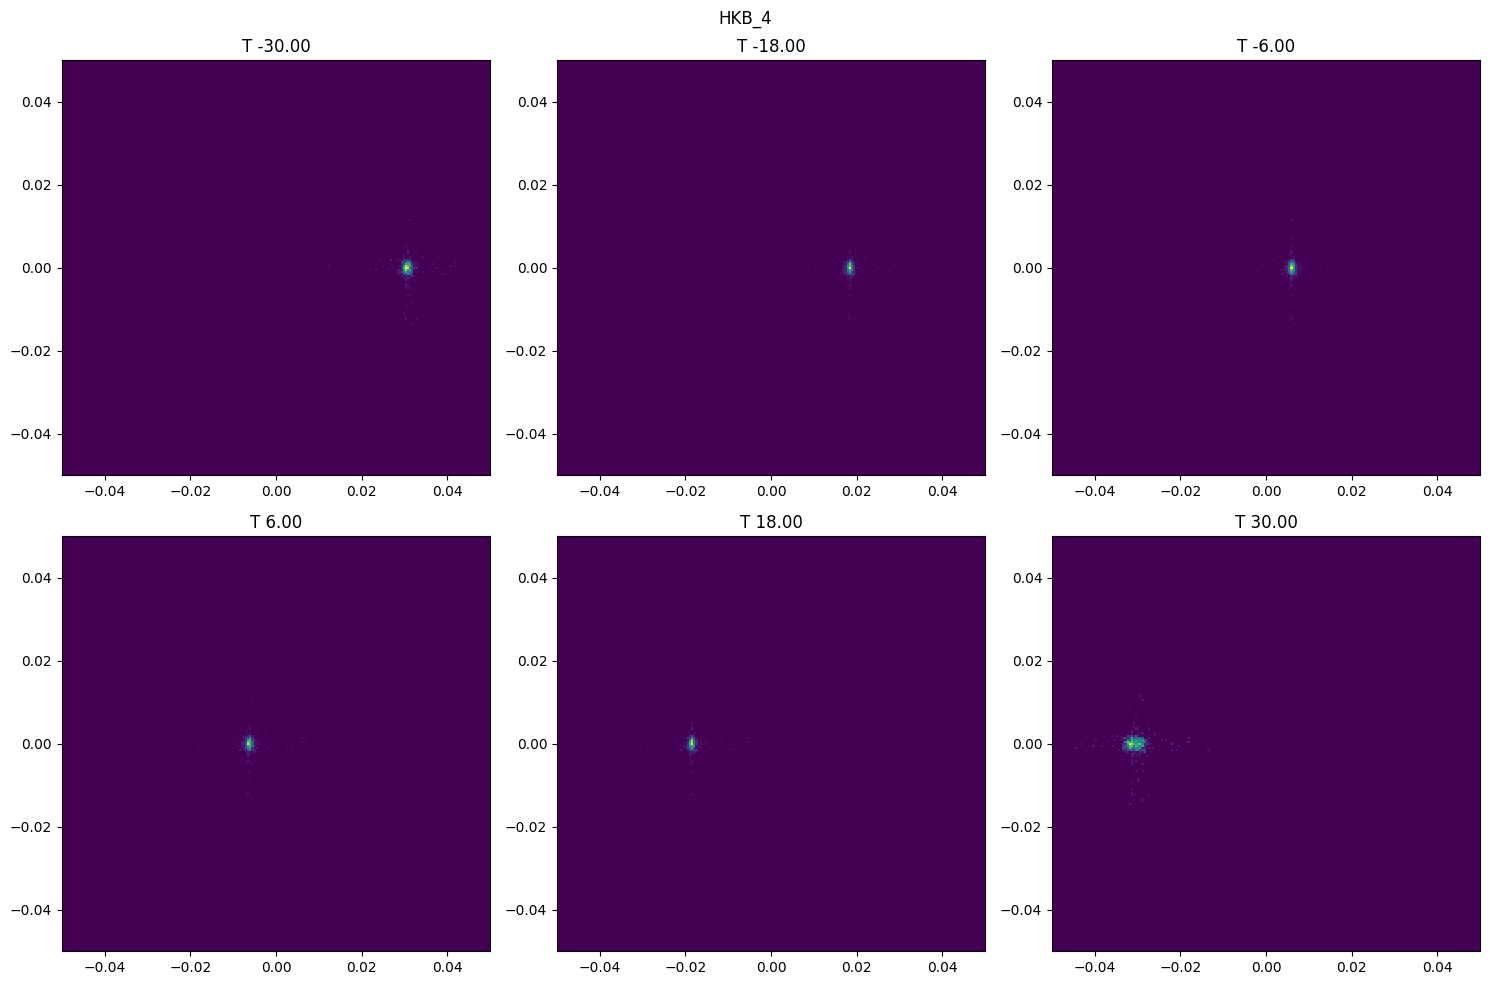

In [38]:
# Motor hkb 4

focusing_system = reinitialize(input_beam_path=input_beam_path)

translations = np.linspace(-30, 30, 6)
initial_value = focusing_system.get_hkb_motor_4_translation()

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_hkb_motor_4_translation(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam, xrange=[-0.05, 0.05], yrange=[-0.05, 0.05])
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D.T)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.move_hkb_motor_4_translation(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('HKB_4')
plt.tight_layout()
plt.show()


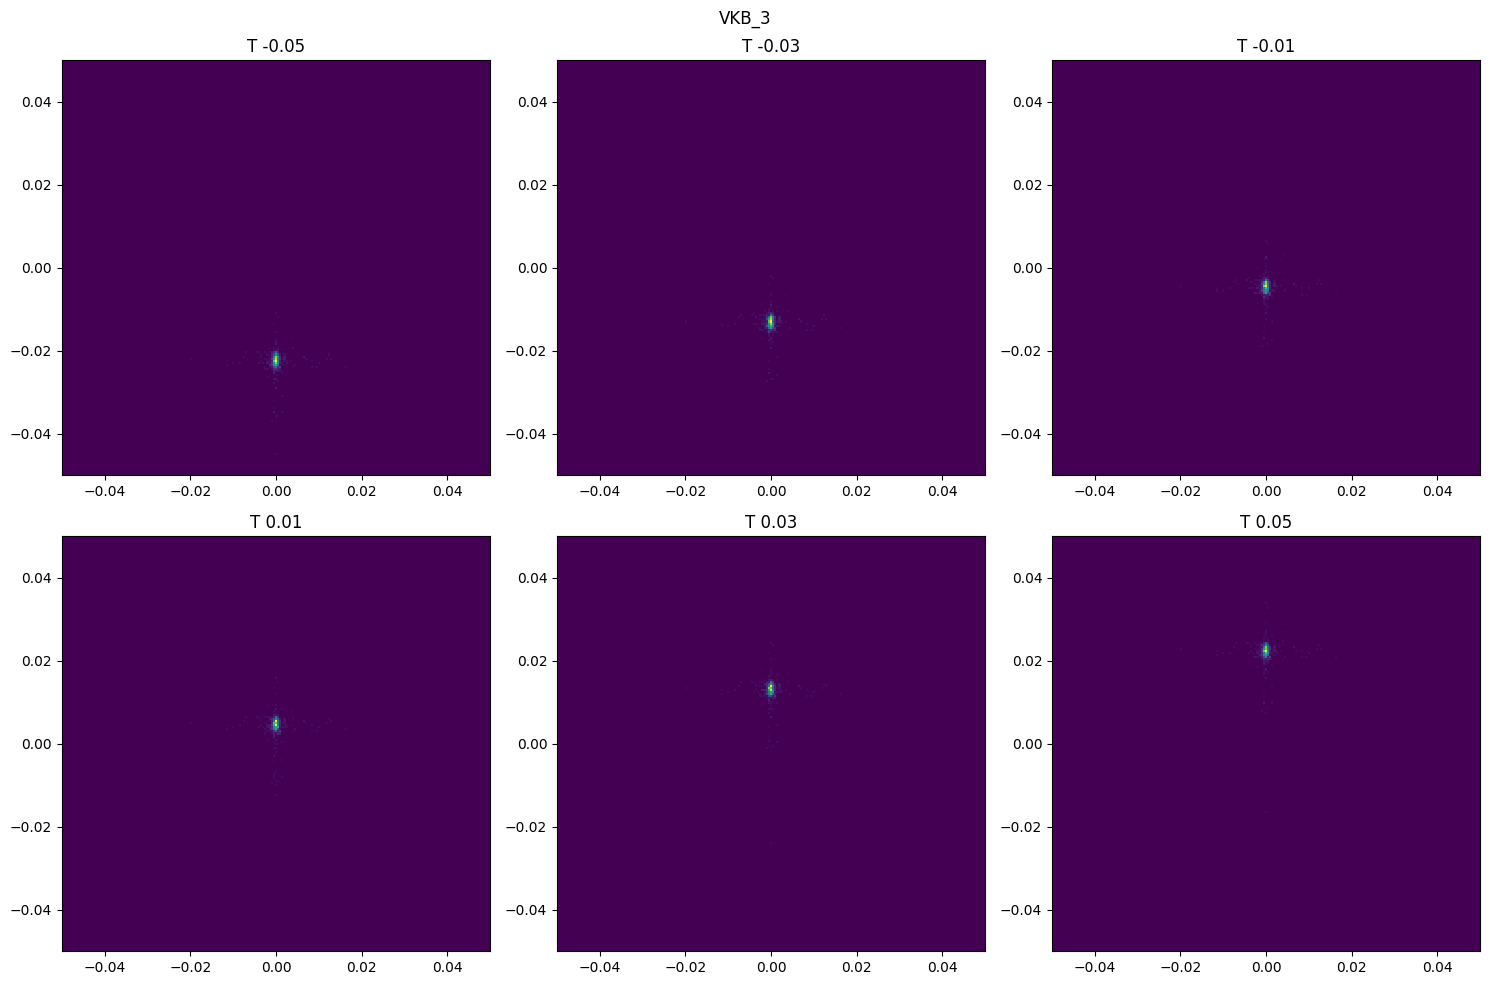

In [41]:
# Motor vkb 3

focusing_system = reinitialize(input_beam_path=input_beam_path)
initial_value = focusing_system.get_vkb_motor_3_pitch()

translations = np.linspace(-0.05, 0.05, 6)

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_vkb_motor_3_pitch(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam, xrange=[-0.05, 0.05], yrange=[-0.05, 0.05])
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D.T)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    #plot_shadow_beam_spatial_distribution(trans_beam)
    # Resetting to initial value
    focusing_system.move_vkb_motor_3_pitch(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('VKB_3')
plt.tight_layout()
plt.show()


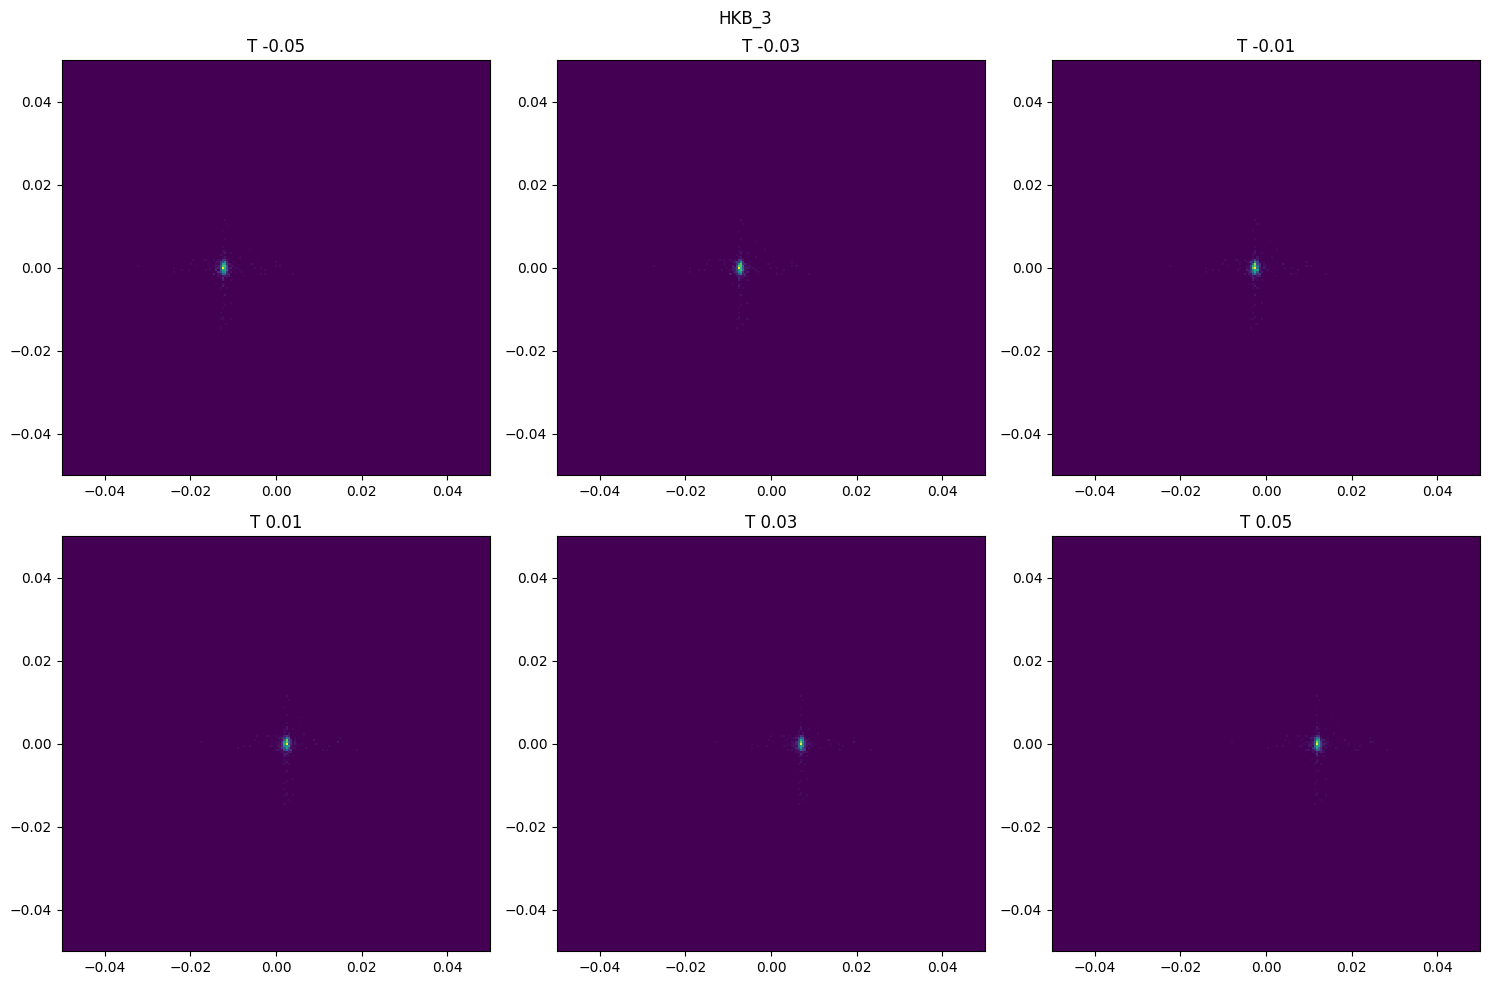

In [44]:
# Motor hkb 3

focusing_system = reinitialize(input_beam_path=input_beam_path)
initial_value = focusing_system.get_hkb_motor_3_pitch()

translations = np.linspace(-0.05, 0.05, 6)

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_hkb_motor_3_pitch(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam,xrange=[-0.05, 0.05], yrange=[-0.05, 0.05])
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D.T)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.move_hkb_motor_3_pitch(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('HKB_3')
plt.tight_layout()
plt.show()


write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Downstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Raytracing_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Downstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Raytracing_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_VKB_bender

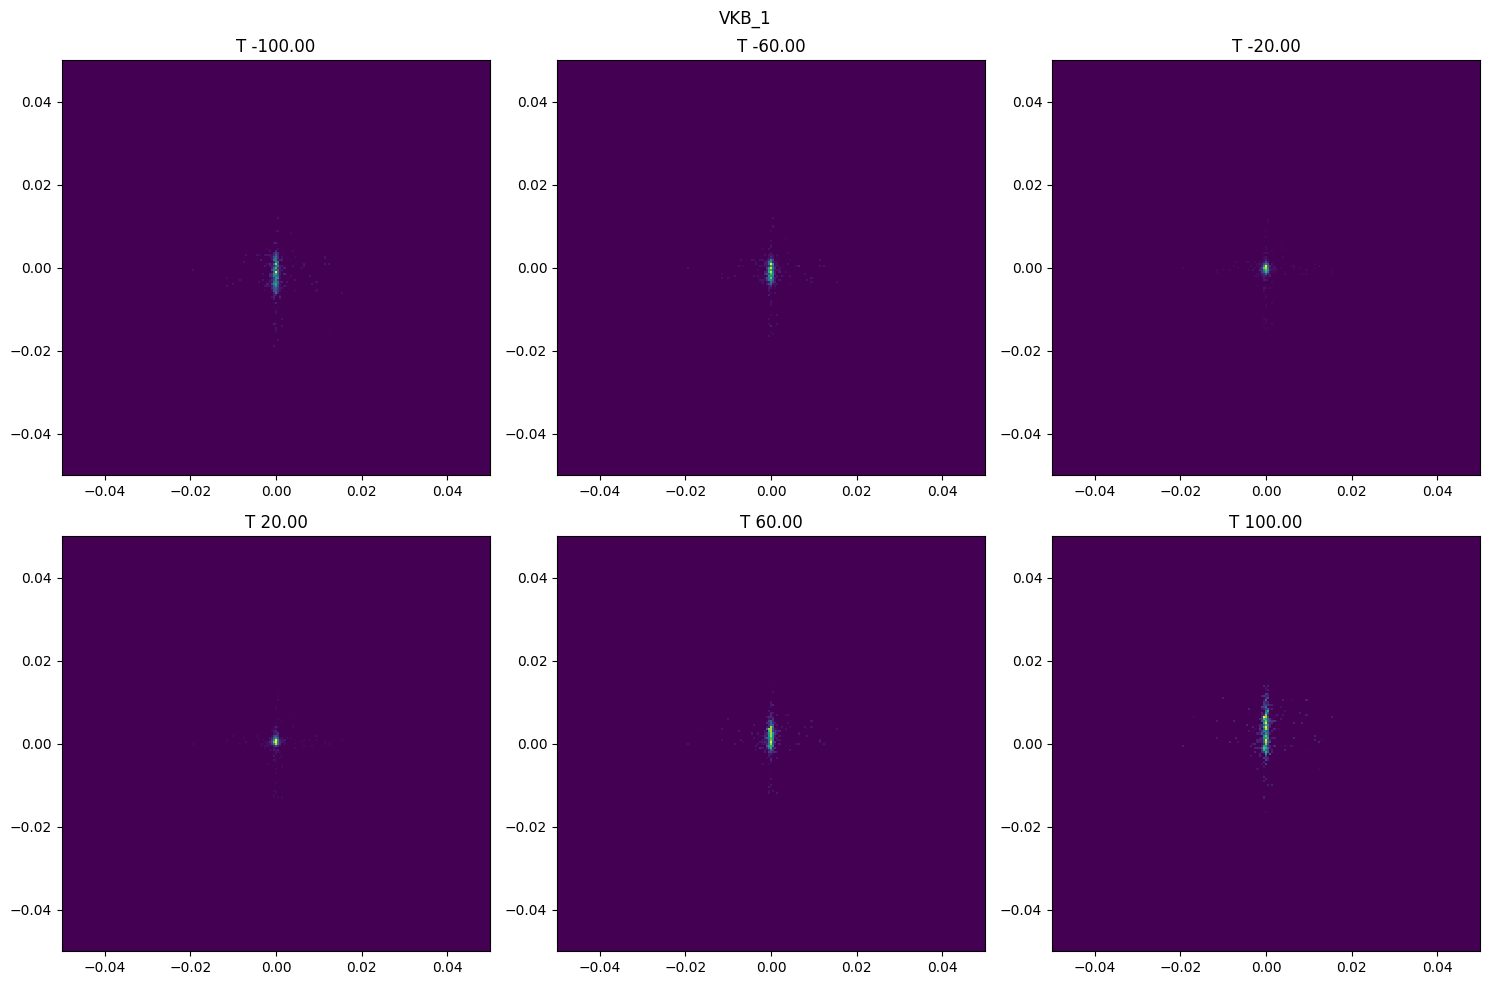

In [53]:
# Motor vkb 1

focusing_system = reinitialize(input_beam_path=input_beam_path)
initial_value = focusing_system.get_vkb_motor_1_bender()

translations = np.linspace(-100, 100, 6)

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_vkb_motor_1_bender(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam, xrange=[-0.05, 0.05], yrange=[-0.05, 0.05])
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D.T)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.move_vkb_motor_1_bender(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('VKB_1')
plt.tight_layout()
plt.show()


write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Downstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Raytracing_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Downstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Raytracing_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_VKB_bender

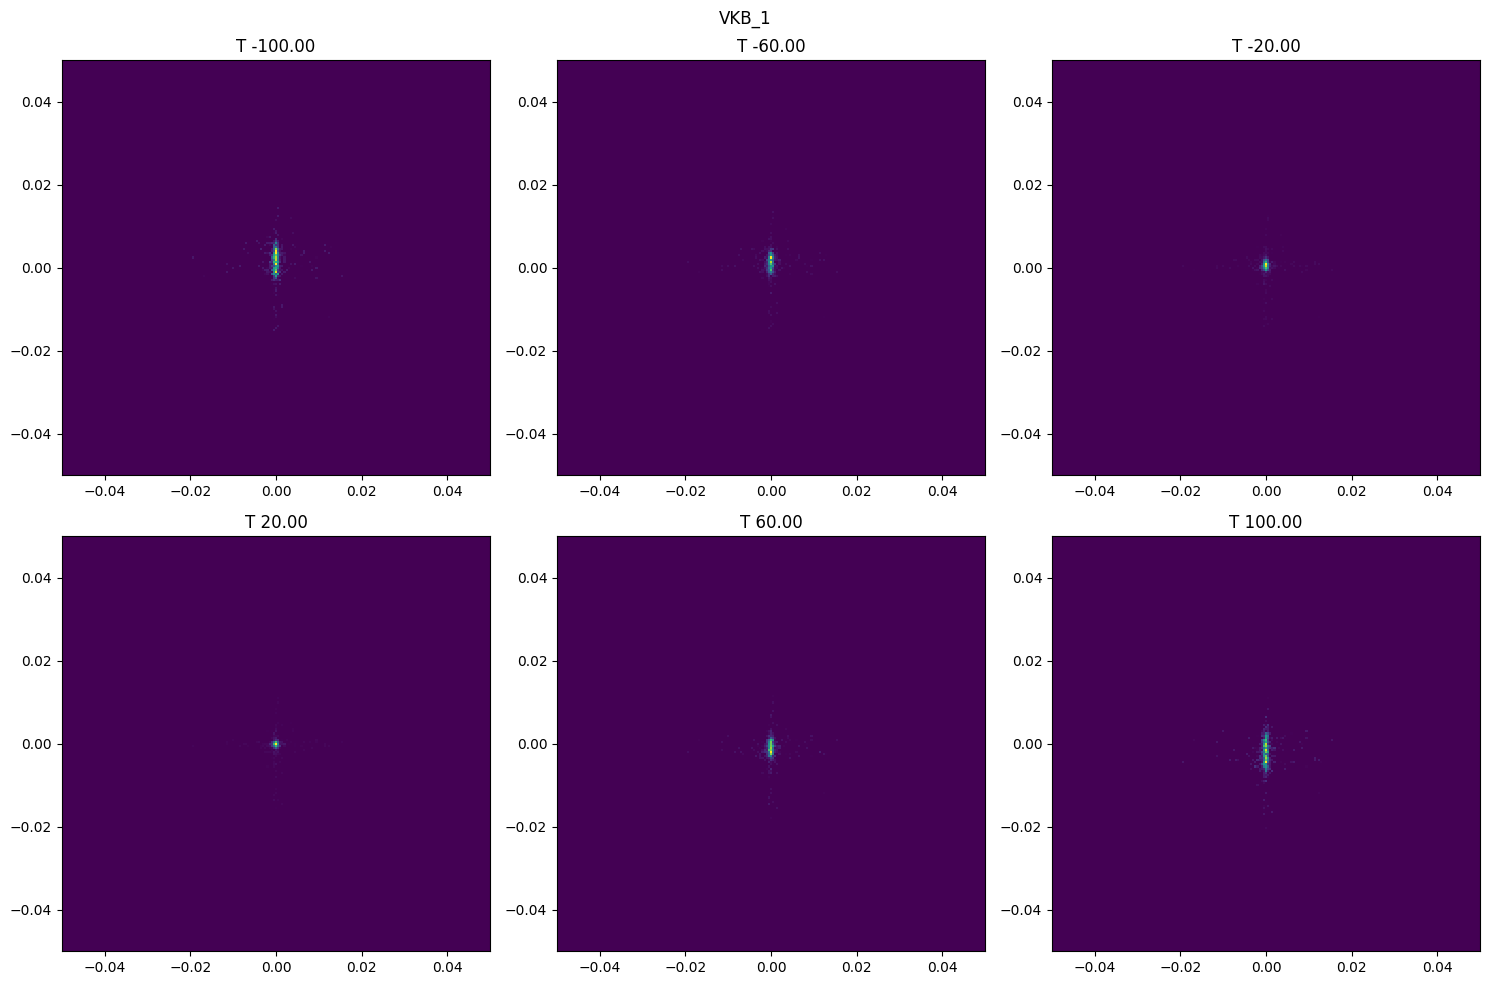

In [55]:
# Motor vkb 2

focusing_system = reinitialize(input_beam_path=input_beam_path)
initial_value = focusing_system.get_vkb_motor_2_bender()

translations = np.linspace(-100, 100, 6)

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_vkb_motor_2_bender(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam, xrange=[-0.05, 0.05], yrange=[-0.05, 0.05])
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D.T)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.move_vkb_motor_2_bender(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('VKB_1')
plt.tight_layout()
plt.show()


write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Downstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Raytracing_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Downstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Raytracing_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_HKB_bender

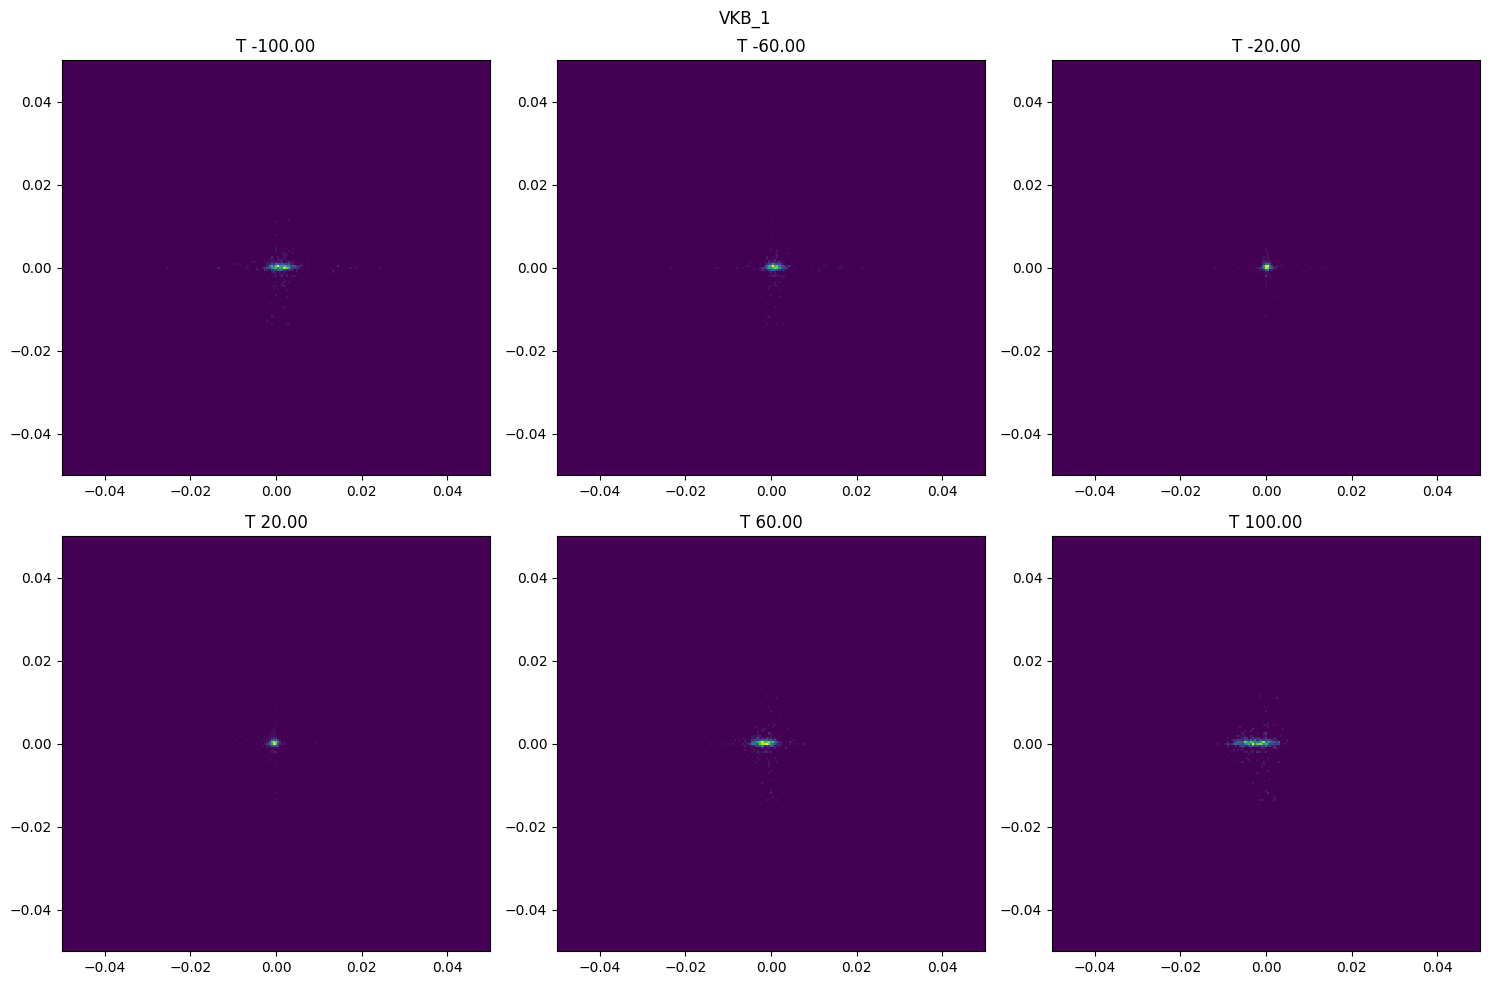

In [56]:
# Motor hkb 1

focusing_system = reinitialize(input_beam_path=input_beam_path)
initial_value = focusing_system.get_hkb_motor_1_bender()

translations = np.linspace(-100, 100, 6)

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_hkb_motor_1_bender(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam, xrange=[-0.05, 0.05], yrange=[-0.05, 0.05])
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D.T)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.move_hkb_motor_1_bender(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('VKB_1')
plt.tight_layout()
plt.show()


write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Downstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Raytracing_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Downstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Raytracing_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/ML_Control_System/work_directory/Upstream_HKB_bender

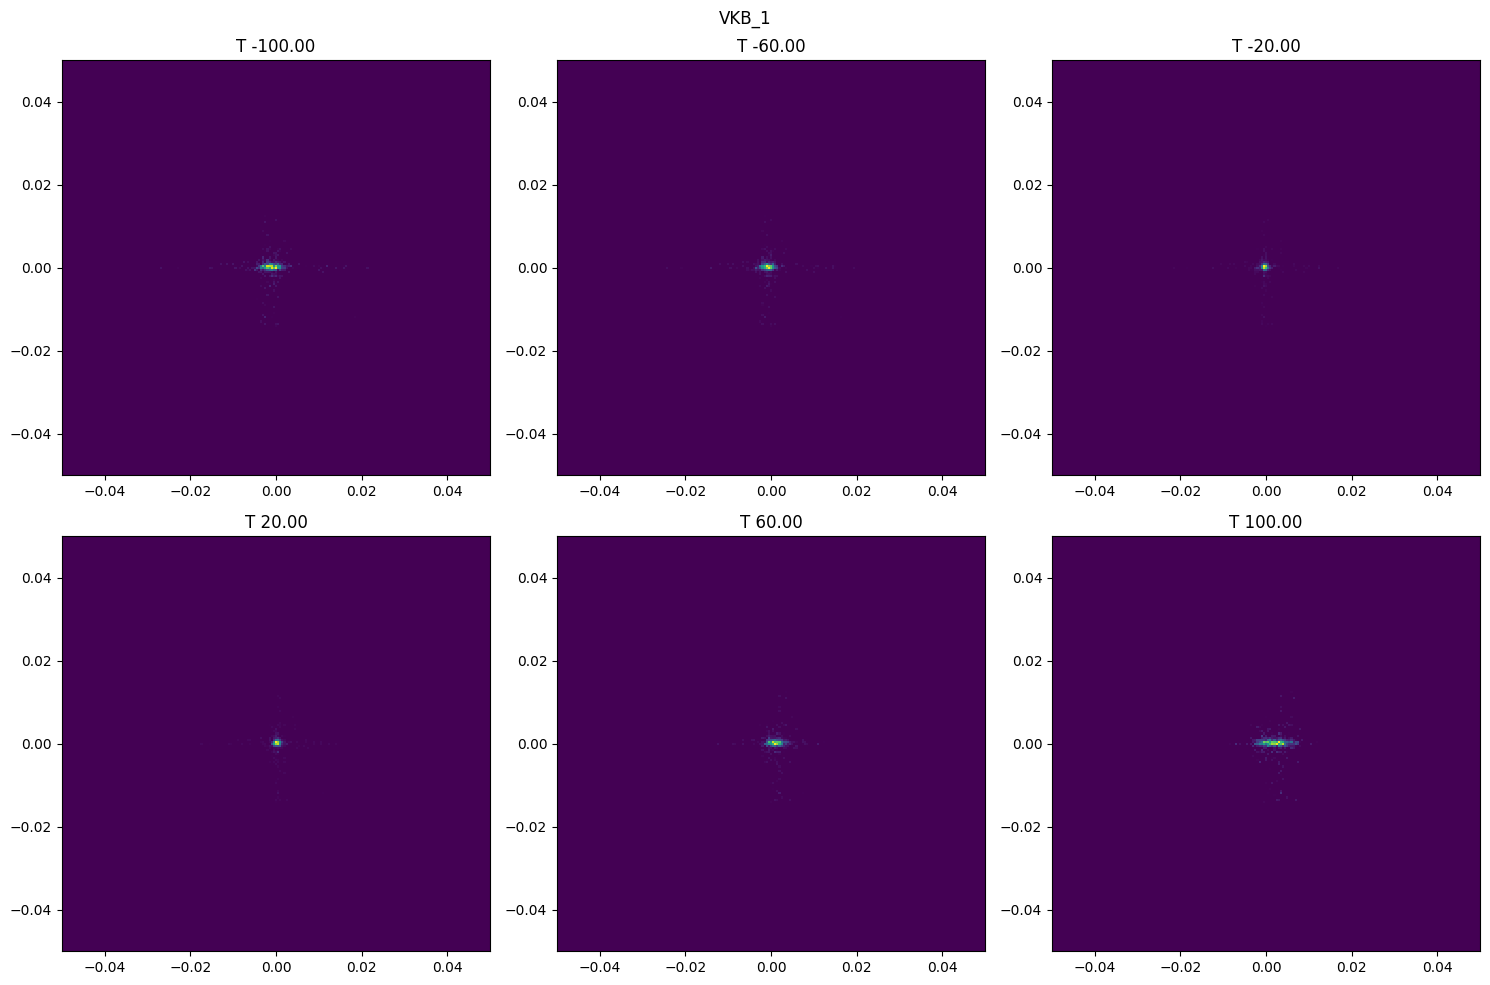

In [57]:
# Motor vkb 2

focusing_system = reinitialize(input_beam_path=input_beam_path)
initial_value = focusing_system.get_hkb_motor_2_bender()

translations = np.linspace(-100, 100, 6)

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_hkb_motor_2_bender(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam, xrange=[-0.05, 0.05], yrange=[-0.05, 0.05])
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D.T)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.move_hkb_motor_2_bender(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('VKB_1')
plt.tight_layout()
plt.show()


In [21]:
clean_up()